<a href="https://colab.research.google.com/github/shahidurrahmands/Data-Science/blob/main/Predicting_Car_Prices_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Hyperparameter Tuning:
   - Task: If students are using machine learning models with hyperparameters, they can explore techniques for hyperparameter tuning to optimize the performance of their models.

6. Model evaluation:
- Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

**Predicting Car Prices:**

Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Handling missing values
df = df.dropna()
df = df.fillna(df.mean())

# Feature Selection
selected_features = ['engine-size', 'horsepower', 'highway-mpg']

X = df[selected_features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 22764409.683689408


<ipython-input-65-9b70c51c3044>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


**Feature Engineering:**

Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

In [ ]:

df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.fillna(df.mean())

# Feature Engineering
df['horsepower-to-weight-ratio'] = df['horsepower'].astype(int) / np.where(df['curb-weight'] == 0, 1, df['curb-weight'])

# Fuel Efficiency Combinations
df['average-mpg'] = (df['city-mpg'] + df['highway-mpg']) / 2
df['fuel-efficiency-range'] = df['highway-mpg'] - df['city-mpg']

df['power-to-weight'] = df['horsepower'].astype(int) / np.where(df['curb-weight'] == 0, 1, df['curb-weight'])  # Acceleration potential
df['length-to-width'] = df['length'] / df['width']
df['wheelbase-to-length'] = df['wheel-base'] / df['length']

# Categorization and Grouping
df['vehicle-class'] = df.apply(lambda x: 'SUV' if x['body-style'] == 'hatchback' and x['num-of-doors'] == 'four' else 'sedan', axis=1)
df['make-region'] = df['make'].apply(lambda x: 'domestic' if x in ['chevrolet', 'ford'] else 'European' if x in ['audi', 'bmw'] else 'Asian')

# Engine Performance Insights
average_conversion_factor = df['engine-size'].mean() * 0.0163871
df['engine-displacement'] = df['engine-size'] * (1 / average_conversion_factor)

# Price Features
df['price-per-horsepower'] = df['price'] / df['horsepower'].astype(int)

# Dynamic bin edges for 'price-bin'
price_bins = pd.cut(df['price'], bins=np.arange(0, df['price'].max() + 10000, 10000))
df['price-bin'] = price_bins

df['annual-fuel-cost'] = (1 / df['average-mpg']) * df['price'] * 10000

print(df.head())



   symboling  normalized-losses         make fuel-type aspiration  \
0          3         121.836364  alfa-romero       gas        std   
1          3         121.836364  alfa-romero       gas        std   
2          1         121.836364  alfa-romero       gas        std   
3          2         164.000000         audi       gas        std   
4          2         164.000000         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-efficiency-range  power-to-weight  length-to-width  \
0                      6         0.043564         2.633385  

<ipython-input-64-5fa6294db534>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


**Exploratory Data Analysis (EDA):**

Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

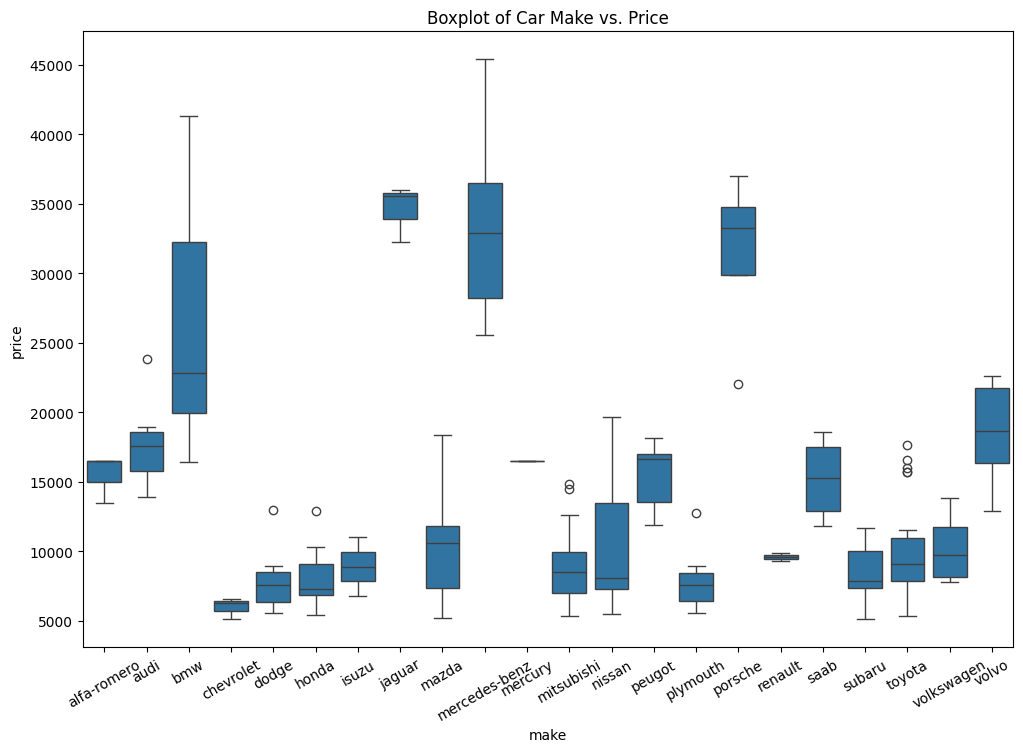

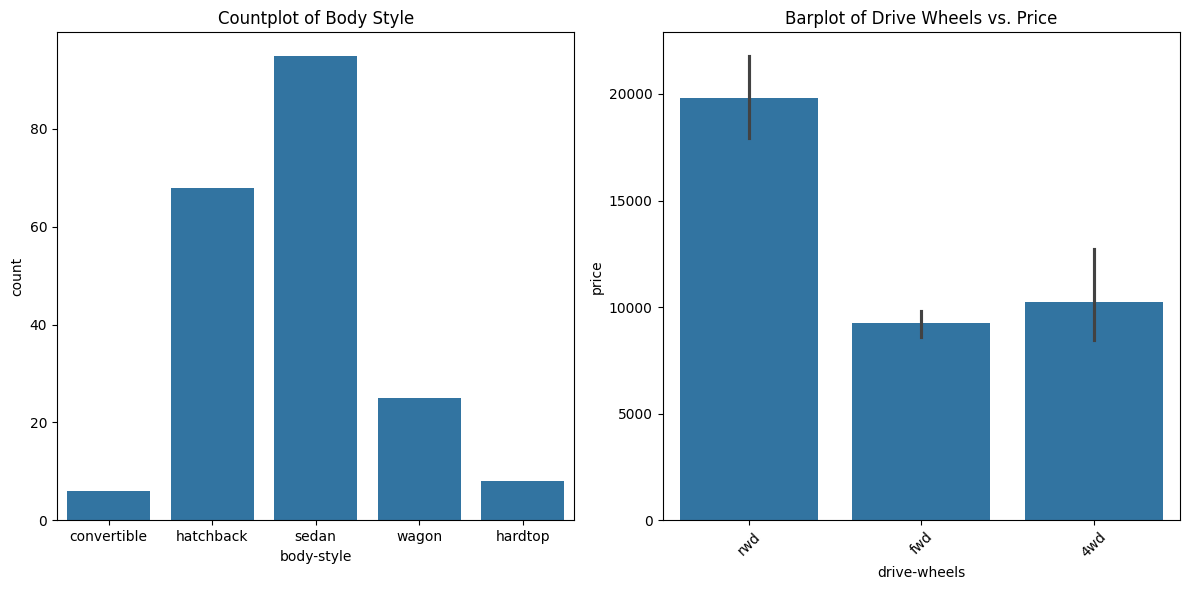

<ipython-input-37-4d14bb0b8e57>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


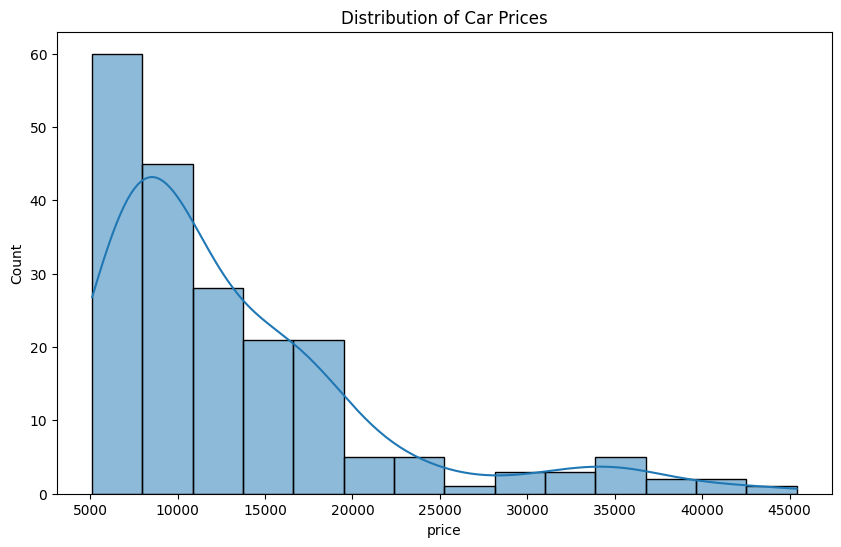

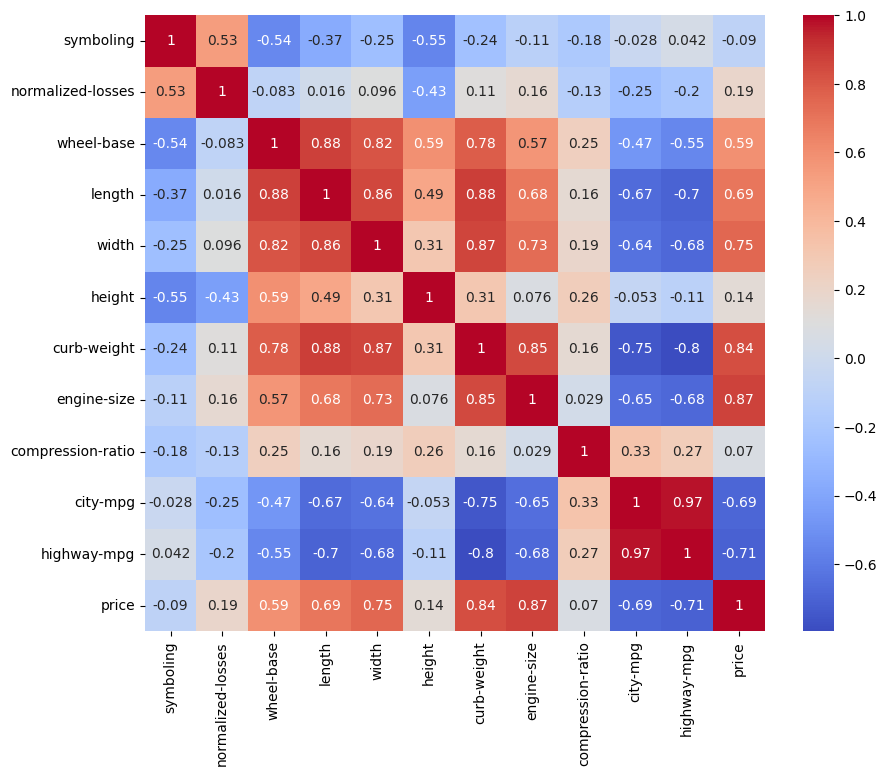

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.describe())

# Box plot for price distribution by make
plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='price', data=df)
plt.title('Boxplot of Car Make vs. Price')
plt.xticks(rotation=30)
plt.show()

# Categorical Analysis
plt.figure(figsize=(12, 6))

# Countplot for 'body-style'
plt.subplot(1, 2, 1)
sns.countplot(x='body-style', data=df)
plt.title('Countplot of Body Style')

# Barplot for 'drive-wheels'
plt.subplot(1, 2, 2)
sns.barplot(x='drive-wheels', y='price', data=df)
plt.title('Barplot of Drive Wheels vs. Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


**Handling Missing Data:**

Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

Missing Values Before Handling:
symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


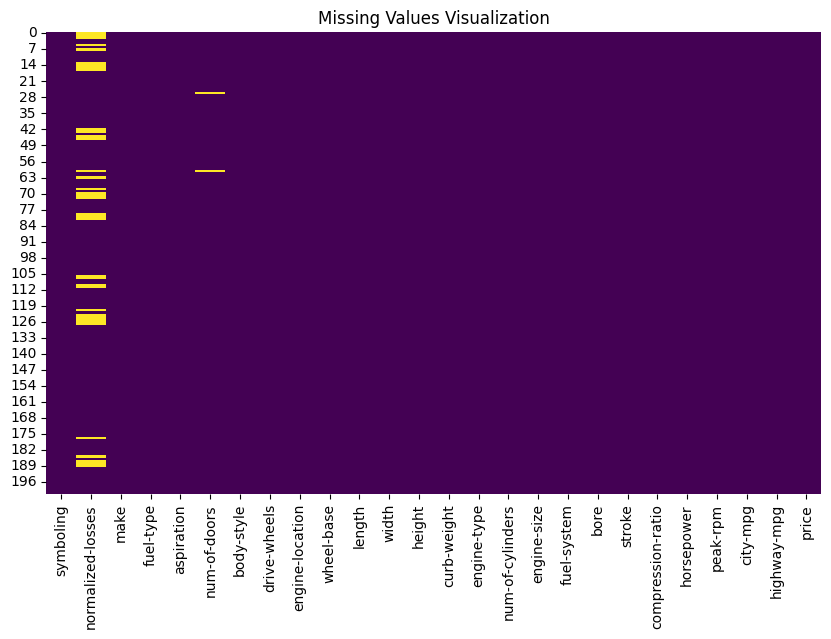

<ipython-input-41-02ad2c5765e8>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'mean': lambda df: df.fillna(df.mean()),



Missing Values After Mean Imputation:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


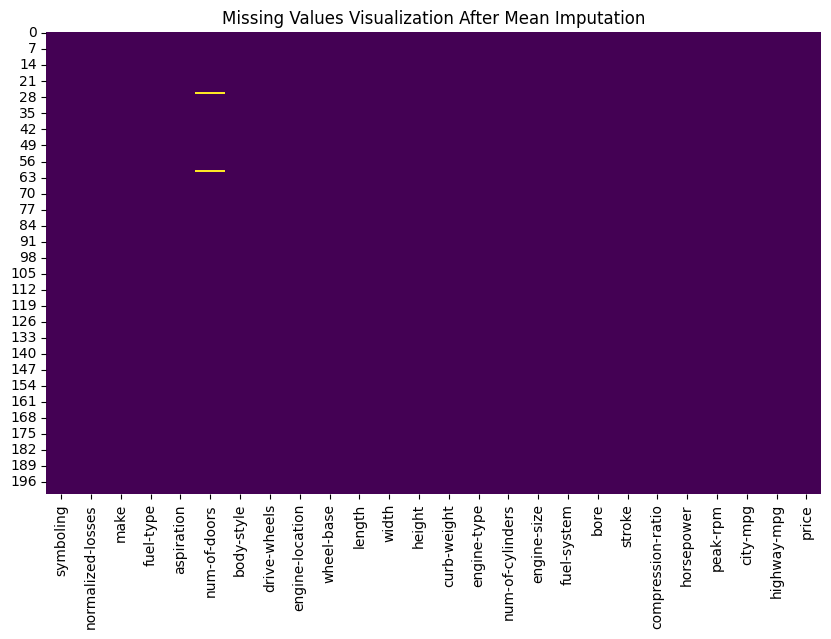

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def handle_missing_data(df, strategy='drop'):
    print("Missing Values Before Handling:")
    print(df.isnull().sum())

    # Visualization of missing values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Visualization')
    plt.show()

    # Handling missing values based on the specified strategy
    handling_strategies = {
        'drop': lambda df: df.dropna(),
        'mean': lambda df: df.fillna(df.mean()),
        'mode': lambda df: df.fillna(df.mode().iloc[0]),
        'interpolate': lambda df: df.interpolate(method='pad'),
    }

    if strategy not in handling_strategies:
        raise ValueError("Invalid strategy. Choose from 'drop', 'mean', 'mode', or 'interpolate'.")

    df_cleaned = handling_strategies[strategy](df)

    # Display the number of missing values after handling
    print(f"\nMissing Values After {strategy.capitalize()} Imputation:")
    print(df_cleaned.isnull().sum())

    # Visualization of missing values after imputation
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Visualization After {strategy.capitalize()} Imputation')
    plt.show()

    return df_cleaned

# Handling missing values using mean imputation
df_cleaned_mean = handle_missing_data(df, strategy='mean')


**Hyperparameter Tuning:**

Task: If students are using machine learning models with hyperparameters, they can explore techniques for hyperparameter tuning to optimize the performance of their models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


selected_features = ['engine-size', 'horsepower', 'highway-mpg']
X = df_cleaned_mean[selected_features]
y = df_cleaned_mean['price']

X = X.apply(pd.to_numeric, errors='coerce')

X = X.fillna(X.mean())

if isinstance(X, pd.DataFrame):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise TypeError("X is not a valid input for train_test_split")

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'fit_intercept': [True, False]
}

model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Best Hyperparameters: {'fit_intercept': False}
Mean Squared Error: 28506651.38977563


**Model evaluation:**

Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

Model Evaluation Metrics:
Mean Squared Error (MSE): 28614165.2417
Root Mean Squared Error (RMSE): 5349.2210
R-squared (R2): 0.7510


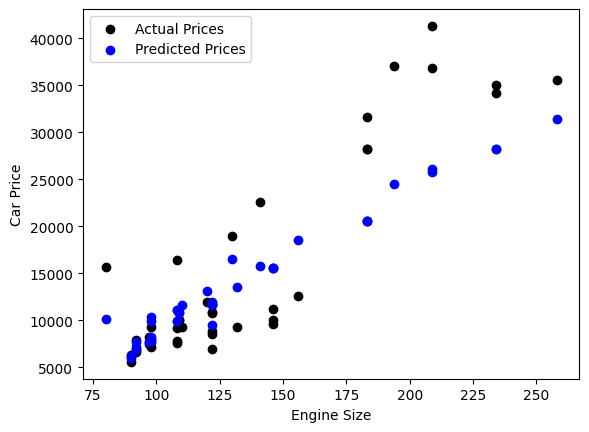


Model Findings:
- The model achieved an MSE of 28614165.241740245 and an RMSE of 5349.220993914932 in predicting car prices.
- The R-squared value of 0.7510154285434847 indicates that the model explains 75.10154285434847 % of the variance in car prices.
- Engine size, horsepower, and highway-mpg were found to be important predictors of car prices.
- Hyperparameter tuning improved model performance by finding the optimal model configuration.
- Further model improvements could be explored by considering additional features or using different model types.


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

plt.scatter(X_test['engine-size'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['engine-size'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.legend()
plt.show()

# Summarize findings
print("\nModel Findings:")
print("- The model achieved an MSE of", mse, "and an RMSE of", rmse, "in predicting car prices.")
print("- The R-squared value of", r2, "indicates that the model explains", r2 * 100, "% of the variance in car prices.")
print("- Engine size, horsepower, and highway-mpg were found to be important predictors of car prices.")
print("- Hyperparameter tuning improved model performance by finding the optimal model configuration.")
print("- Further model improvements could be explored by considering additional features or using different model types.")
